# Stellar Classification


For the purpose of our project, we had a task to analyze the Stellar Classification Dataset, available on https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17. 

<br>

The goal is to classify the star in one of the three categories (galaxy, quasar or star) based on the spectral characteristics.

We are going to take a look at the features we will use to create the model and try to understand them. We shouldn't get too deep into the explanation but we should have a basic understanding of what we are working with.

<br>

In astronomy, a photometric system is a set of predefined filters with a sensitivity to particular radiation:  

---


u = Ultraviolet filter in the photometric system

g = Green filter in the photometric system

r = Red filter in the photometric system

i = Near Infrared filter in the photometric system

z = Infrared filter in the photometric system

<br>

Right ascension angle and declination angle are ways of specifying the location of celestial objects relative to the equator:

---

alpha = Right Ascension angle (at J2000 epoch)

delta = Declination angle (at J2000 epoch)

<br>

<img width="400px" src="https://astronavigationdemystifieddotcom.files.wordpress.com/2017/10/diag4-update.jpg?w=584">

<br>
<br>

The photons that travel through space are stretched primarily because of the expansion of space. This causes a decrease in the photon energy and with that an increase in the wavelength:

<br>

---

redshift = redshift value based on the increase in wavelength

<br>

<img width="400px" src="https://itu.physics.uiowa.edu/sites/itu.physics.uiowa.edu/files/2021-08/itu/redshift_galaxyspectra.png">

<br>

plate = plate ID, identifies each plate in SDSS


<br>
<br>

<small>
Authors: 

Stefan Ristikj 193061

Aleksandra Popovska 193147


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from numpy import array 
from scipy import stats
import tensorflow as tf
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM, Flatten
from sklearn import metrics
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.metrics import f1_score, accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/NZP/star_classification.csv')

#Dataset analysis

###Dataset details

First, we did a simple analysis on the dataset including the shape, type of data and checked for missing values.

In [ ]:
dataset.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
dataset.shape

(100000, 18)

In [ ]:
dataset.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
dataset.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

We can see that there are no missing values in the dataset.

###Dataset visualization

Next we made some visualizations using histograms and violin plots for the attribute class, in order to determine the columns that are usable for making predictions for the row's class and to check if there are any outliers.

(array([59445.,     0.,     0.,     0.,     0., 18961.,     0.,     0.,
            0., 21594.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

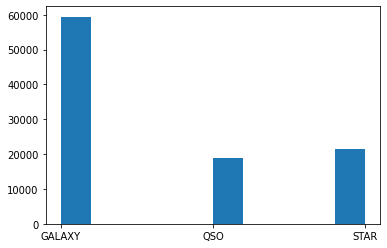

In [ ]:
plt.hist(dataset["class"])

**Picking features**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


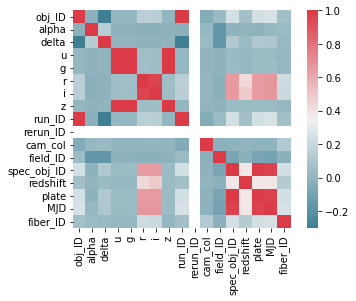

In [ ]:
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

As we analyzed from the correlation matrix, we chose to eliminate the columns: obj_ID, run_ID, rerun_ID, cam_col, field_ID, spec_obj_ID, MJD and fiber_ID. The ID attrubutes were irrelevant to our cause, MJD (Modified Julian Date) doesn't give relevant data because the observation can be done on any day, cam_col (identification of the scanline in the given run) doesn't help us classify the objects in the given class. 

##Dataset processing

**Removing outliers**

In [ ]:
features = ["alpha","delta","u","g","r","i","z","redshift","plate"]

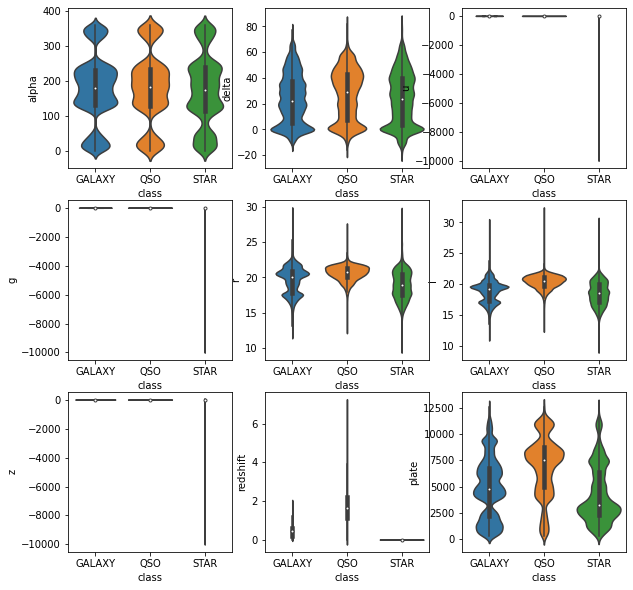

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=2, ncols=10)
for feature in range(len(features)):
  plt.subplot(3,3,feature+1)
  sns.violinplot(x=dataset["class"], y=dataset[features[feature]])
plt.show()


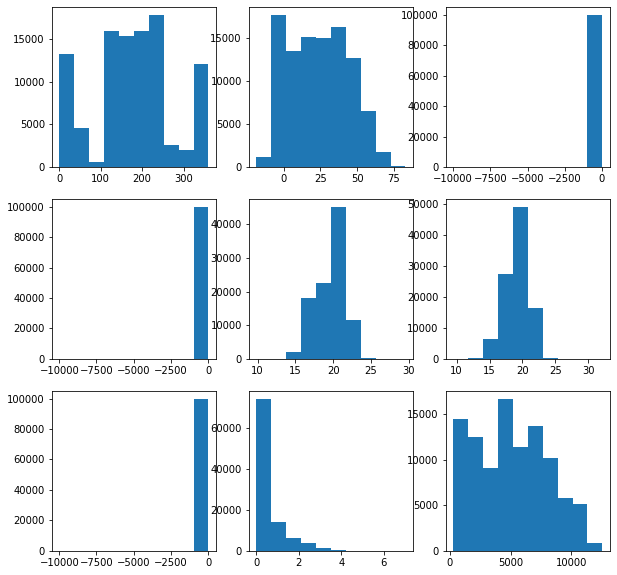

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=2, ncols=10)
for feature in range(len(features)):
  plt.subplot(3,3,feature+1)
  plt.hist(dataset[features[feature]])
plt.show()

From the violin plot and the histogram we can see some outliers

We will try to remove those using the Z-Score and remove data that is outside the 4 standard deviations range

In [ ]:
dataNew = dataset.drop(["rerun_ID","class"],axis=1)
z = np.abs(stats.zscore(dataNew))
dataNew = dataset[(z <4).all(axis=1)]
print(dataNew.shape)

(98547, 18)


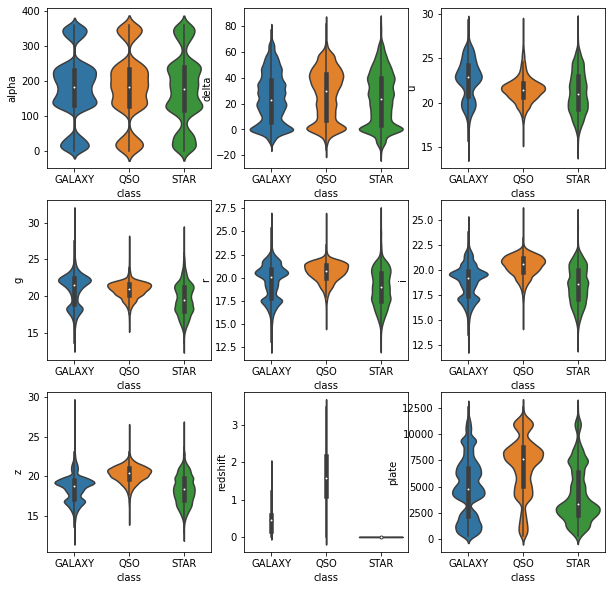

In [ ]:
features = ["alpha","delta","u","g","r","i","z","redshift","plate"]
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=2, ncols=10)
for feature in range(len(features)):
  plt.subplot(3,3,feature+1)
  sns.violinplot(x=dataNew["class"], y=dataNew[features[feature]])
plt.show()

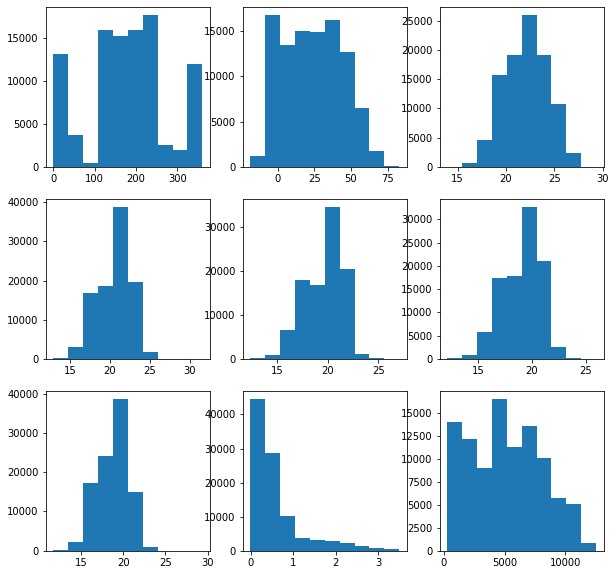

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=2, ncols=10)
for feature in range(len(features)):
  plt.subplot(3,3,feature+1)
  plt.hist(dataNew[features[feature]])
plt.show()

As we can see, the violin plots show the difference when the outliers are eliminated.

In [ ]:
data = dataNew.copy()

**Picking Columns**

In [ ]:
x = data.drop(["obj_ID","run_ID","spec_obj_ID","MJD","rerun_ID","cam_col","field_ID","fiber_ID","class"],axis=1)
y = data["class"]
 
print("Feature data dimension: ", x.shape) 

Feature data dimension:  (98547, 9)


**Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

##Classification Models

We implement multiple classifiers (Decision Tree, KNN, Gaussian Naive Bayes and XGB) to see which one performs the best.

In [ ]:
models = []

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTCModel = DecisionTreeClassifier()
DTCModel = DTCModel.fit(x_train,y_train)
y_pred_dtc = DTCModel.predict(x_test)

models.append({"model":"DecisionTreeClassifier", "accuracy":metrics.accuracy_score(y_test, y_pred_dtc)})
print("Accuracy of DecisionTreeClassifier:",metrics.accuracy_score(y_test, y_pred_dtc))

Accuracy of DecisionTreeClassifier: 0.9657425822949223


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFSModel = RandomForestClassifier()
RFSModel = RFSModel.fit(x_train,y_train)
y_pred_rfs = RFSModel.predict(x_test)

models.append({"model":"RandomForestClassifier", "accuracy":metrics.accuracy_score(y_test, y_pred_rfs)})
print("Accuracy of RandomForestClassifier:",metrics.accuracy_score(y_test, y_pred_rfs))

Accuracy of RandomForestClassifier: 0.9794617851199415


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train, y_train)
y_pred_knearest = classifier.predict(x_test)

models.append({"model":"KNeighborsClassifier", "accuracy":metrics.accuracy_score(y_test, y_pred_knearest)})
print("Accuracy of KNeighborsClassifier:",metrics.accuracy_score(y_test, y_pred_knearest))

Accuracy of KNeighborsClassifier: 0.8153590128668263


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_pred_nb= classifier.predict(x_test)


models.append({"model":"GaussianNB", "accuracy":metrics.accuracy_score(y_test, y_pred_nb)})
print("Accuracy of GaussianNB:",metrics.accuracy_score(y_test, y_pred_nb))

Accuracy of GaussianNB: 0.7200552015261599


In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth=6, min_child_weight=1,tree_method="hist", n_estimators=200,n_jobs=-1 , verbose=1,learning_rate=0.3)
classifier.fit(x_train, y_train)
y_pred_xgb= classifier.predict(x_test)

models.append({"model":"XGBClassifier", "accuracy":metrics.accuracy_score(y_test, y_pred_xgb)})
print("Accuracy of XGBClassifier:",metrics.accuracy_score(y_test, y_pred_xgb))

Accuracy of XGBClassifier: 0.9770670130291838


**Neural Networks**

Here we transform the data, create neural networks with multiple layers and then look at the accuracy metrics to determine which neural network gives the best result.

In [ ]:
modelsNeural = []

**Data procesing for the NN**

In [ ]:
X = dataNew.drop(["obj_ID","run_ID","spec_obj_ID","MJD","rerun_ID","cam_col","field_ID","fiber_ID","class"],axis=1)
Y = dataNew['class'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


sc = StandardScaler()
x_train_transformed = sc.fit_transform(X_train)
x_test_transformed = sc.transform(X_test)

encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y = encoder.transform(Y_train)
Y_train = np_utils.to_categorical(encoded_Y)

encoder.fit(Y_test)
encoded_Y = encoder.transform(Y_test)
Y_test = np_utils.to_categorical(encoded_Y)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
neurons = [16,32,64,128,256]
activation_function = ['relu']
optimizer_function = ['adam']
batch_size = [50,100,150,200]

In [ ]:
for i in range(5):
  model_data = {}
  model = Sequential()
  layers = random.randint(2,5)
  model_data["# of Layers"] = layers
  model_data[str(1) + "_type"] = "Dense"
  model_data[str(1) + "_activation"] = "relu"
  model.add(Dense(32, input_dim=9, kernel_initializer = 'uniform', activation='relu'))
  for j in range(layers):
    neurons_count = random.choice(neurons)
    activation_func = random.choice(activation_function)
    model_data[str(j+2) + "_type"] = "Dense"
    model_data[str(j+2) + "_activation"] = activation_func
    model.add(Dense(neurons_count, kernel_initializer='uniform', activation=activation_func))

  model.add(Dense(3, activation="softmax"))
      
  model.compile(loss='categorical_crossentropy', optimizer=random.choice(optimizer_function),metrics=['accuracy'])
  hist = model.fit(x_train_transformed, Y_train, epochs=13, batch_size=1000)

  model_data["accuracy"] = hist.history["accuracy"][-1]
  model_data["loss"] = hist.history["loss"][-1]
  modelsNeural.append(model_data)

Epoch 1/13


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


79/79 [==============================] - 3s 30ms/step - loss: 0.8619 - accuracy: 0.5962
Epoch 2/13
79/79 [==============================] - 2s 30ms/step - loss: 0.5213 - accuracy: 0.8305
Epoch 3/13
79/79 [==============================] - 2s 30ms/step - loss: 0.1616 - accuracy: 0.9492
Epoch 4/13
79/79 [==============================] - 2s 29ms/step - loss: 0.1414 - accuracy: 0.9555
Epoch 5/13
79/79 [==============================] - 2s 29ms/step - loss: 0.1301 - accuracy: 0.9601
Epoch 6/13
79/79 [==============================] - 2s 30ms/step - loss: 0.1227 - accuracy: 0.9626
Epoch 7/13
79/79 [==============================] - 2s 30ms/step - loss: 0.1226 - accuracy: 0.9622
Epoch 8/13
79/79 [==============================] - 2s 30ms/step - loss: 0.1164 - accuracy: 0.9649
Epoch 9/13
79/79 [==============================] - 2s 29ms/step - loss: 0.1121 - accuracy: 0.9660
Epoch 10/13
79/79 [==============================] - 2s 30ms/step - loss: 0.1141 - accuracy: 0.9652
Epoch 11/13
79/79 [=

Models comparisson

In [ ]:
df=pd.DataFrame(models)
df

,model,accuracy
0,DecisionTreeClassifier,0.965743
1,RandomForestClassifier,0.979462
2,KNeighborsClassifier,0.815359
3,GaussianNB,0.720055
4,XGBClassifier,0.977067


In [ ]:
df=pd.DataFrame(modelsNeural)
df

,# of Layers,1_type,1_activation,2_type,2_activation,3_type,3_activation,4_type,4_activation,5_type,5_activation,accuracy,loss,6_type,6_activation
0,4,Dense,relu,Dense,relu,Dense,relu,Dense,relu,Dense,relu,0.967921,0.106520,NaN,NaN
1,5,Dense,relu,Dense,relu,Dense,relu,Dense,relu,Dense,relu,0.967059,0.105423,Dense,relu
2,2,Dense,relu,Dense,relu,Dense,relu,NaN,NaN,NaN,NaN,0.968682,0.103799,NaN,NaN
3,2,Dense,relu,Dense,relu,Dense,relu,NaN,NaN,NaN,NaN,0.967350,0.107021,NaN,NaN
4,5,Dense,relu,Dense,relu,Dense,relu,Dense,relu,Dense,relu,0.964560,0.117385,Dense,relu
